<a href="https://colab.research.google.com/github/SujayVivek/TradingStrategies/blob/main/RSITrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as uf
import matplotlib.pyplot as plt


In [2]:
import yfinance as yf
import datetime

# Define the ticker symbol for Nifty 50
ticker_symbol = '^NSEI'

# Define the start and end dates for the dataset
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2022, 1, 1)

# Download the dataset
nifty_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the first few rows of the dataset
print(nifty_data.head())


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2021-01-01  13996.099609  14049.849609  13991.349609  14018.500000   
2021-01-04  14104.349609  14147.950195  13953.750000  14132.900391   
2021-01-05  14075.150391  14215.599609  14048.150391  14199.500000   
2021-01-06  14240.950195  14244.150391  14039.900391  14146.250000   
2021-01-07  14253.750000  14256.250000  14123.099609  14137.349609   

               Adj Close  Volume  
Date                              
2021-01-01  14018.500000  358100  
2021-01-04  14132.900391  495000  
2021-01-05  14199.500000  492500  
2021-01-06  14146.250000  632300  
2021-01-07  14137.349609  559200  


In [3]:
df= nifty_data;
df['MA200'] = df['Adj Close'].rolling(window=200).mean()

In [4]:
df['price change']= df['Adj Close'].pct_change()
df['Upmove']= df['price change'].apply(lambda x: x if x>0 else 0)
df['Downmove']= df['price change'].apply(lambda x: abs(x) if x<0 else 0)

df['avg Up']= df['Upmove'].ewm(span=19).mean()
df['avg Down']= df['Downmove'].ewm(span=19).mean()

df= df.dropna()
df['RS']= df['avg Up']/df['avg Down']
df['RSI']= df['RS'].apply(lambda x: 100-(100/(x+1)))

df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy']= 'Yes'

df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy']= 'No'

df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] > 70), 'Sell']= 'Yes'

df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] < 70), 'Sell']= 'No'




<ipython-input-4-dd07a546bb39>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS']= df['avg Up']/df['avg Down']
<ipython-input-4-dd07a546bb39>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI']= df['RS'].apply(lambda x: 100-(100/(x+1)))
<ipython-input-4-dd07a546bb39>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy,Sell
Date,,,,,,,,,,,,,,,,
2021-10-22,18230.699219,18314.250000,18034.349609,18114.900391,18114.900391,324700,15675.584731,-0.003477,0.000000,0.003477,0.003349,0.002511,1.333804,57.151492,No,No
2021-10-25,18229.500000,18241.400391,17968.500000,18125.400391,18125.400391,418700,15696.119233,0.000580,0.000580,0.000000,0.003073,0.002260,1.359450,57.617239,No,No
2021-10-26,18154.500000,18310.449219,18099.300781,18268.400391,18268.400391,341400,15716.796733,0.007889,0.007889,0.000000,0.003554,0.002034,1.747312,63.600783,No,No
2021-10-27,18295.849609,18342.050781,18167.900391,18210.949219,18210.949219,335200,15736.853979,-0.003145,0.000000,0.003145,0.003199,0.002145,1.491154,59.857965,No,No
2021-10-28,18187.650391,18190.699219,17799.449219,17857.250000,17857.250000,374200,15755.408979,-0.019422,0.000000,0.019422,0.002879,0.003873,0.743348,42.639091,No,No
2021-10-29,17833.050781,17915.849609,17613.099609,17671.650391,17671.650391,336500,15773.080483,-0.010394,0.000000,0.010394,0.002591,0.004525,0.572605,36.411258,No,No
2021-11-01,17783.150391,17954.099609,17697.099609,17929.650391,17929.650391,281200,15790.992485,0.014600,0.014600,0.000000,0.003792,0.004072,0.931103,48.216127,No,No
2021-11-02,17970.900391,18012.250000,17847.599609,17888.949219,17888.949219,296400,15808.013481,-0.002270,0.000000,0.002270,0.003413,0.003892,0.876799,46.717777,No,No
2021-11-03,17947.949219,17988.750000,17757.949219,17829.199219,17829.199219,331000,15824.342227,-0.003340,0.000000,0.003340,0.003071,0.003837,0.800475,44.459087,No,No


In [6]:
#To get the buying dates and the selling dates

def getSignals(df):
  Buying_dates= []
  Selling_dates= []

  for i in range(len(df)):
    if "Yes" in df['Buy'].iloc[i]:
      Buying_dates.append(df.iloc[i+1].name)
      for j in range (1,11):
        if df['RSI'].iloc[i+j] >40:
          Selling_dates.append(df.iloc[i+j+1].name)
          break;
        elif j==10:
          Selling_dates.append(df.iloc[i+j+1].name)
  return Buying_dates, Selling_dates



In [7]:
buy,sell = getSignals(df)

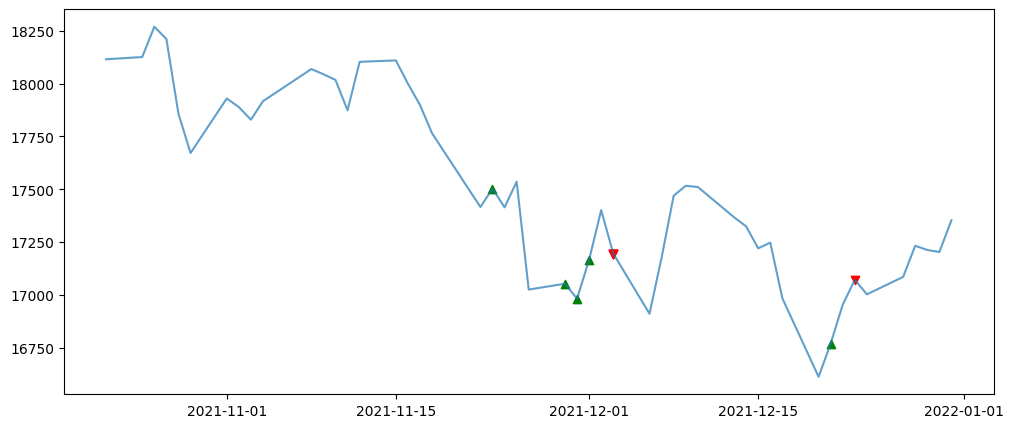

In [8]:
plt.figure(figsize=(12,5))
plt.scatter(df.loc[buy].index, df.loc[buy]['Adj Close'], marker = '^', c='g')
plt.scatter(df.loc[sell].index, df.loc[sell]['Adj Close'], marker = 'v', c='r')
plt.plot(df['Adj Close'], alpha=0.7)

In [9]:
Profits = (df.loc[sell].Open.values - df.loc[buy].Open.values)/df.loc[buy].Open.values

In [10]:
Profits


array([0.00828333, 0.02164071, 0.02191934, 0.01873787, 0.01750717])

In [11]:
#To calc the winning rate

wins= [i for i in Profits if i>0]

Winning_rate= len(wins)/len(Profits)
print(Winning_rate)

1.0


In [13]:
def get_Short_Signals(df):
  Short_Buying_dates= []
  Short_Selling_dates= []

  for i in range(len(df)):
    if "Yes" in df['Buy'].iloc[i]:
      Short_Buying_dates.append(df.iloc[i+1].name)
      for j in range (1,11):
        if df['RSI'].iloc[i+j] <60:
          Short_Selling_dates.append(df.iloc[i+j+1].name)
          break;
        elif j==10:
          Short_Selling_dates.append(df.iloc[i+j+1].name)
  return Short_Buying_dates, Short_Selling_dates

In [15]:
short_buy, short_sell = get_Short_Signals(df)

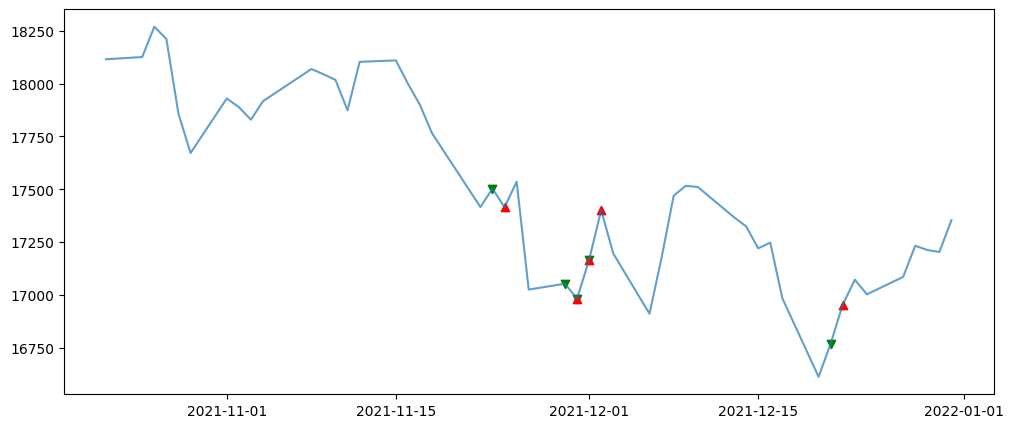

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(df.loc[short_buy].index, df.loc[short_buy]['Adj Close'], marker = 'v', c='g')
plt.scatter(df.loc[short_sell].index, df.loc[short_sell]['Adj Close'], marker = '^', c='r')
plt.plot(df['Adj Close'], alpha=0.7)

In [17]:
Profits_while_shorting = (df.loc[short_buy].Open.values - df.loc[short_sell].Open.values)/df.loc[short_buy].Open.values

In [18]:
Profits_while_shorting

array([-0.01552509,  0.00027266, -0.00312296, -0.00460693, -0.00550883])

In [19]:
Short_wins= [i for i in Profits_while_shorting if i>0]

Short_Winning_rate= len(Short_wins)/len(Profits_while_shorting)
print(Short_Winning_rate)

0.2
